# **Support Vector Machine**

## Importando as dependências

In [ ]:
# installing the Yahoo Finance Library
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
# ignoring future-warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# importing libraries to the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf

# importing machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

plt.style.use('default')

In [ ]:
# allows pandas_datareader to get yahoo data (returns dataframe)
yf.pdr_override()

## Importando os Datasets

In [ ]:
# setting start and end dates
start_date = "2015-01-01"
end_date = "2020-06-01"

In [ ]:
# loading IBOV Index data inside a dataframe
df_ibov = web.get_data_yahoo('^BVSP', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
pd.options.display.float_format = '{:.5f}'.format #supress the scientific value

In [ ]:
df_ibov = df_ibov[['Open', 'Close']]

In [ ]:
X = df_ibov[['Open']]
y = df_ibov[['Close']]

## Trainando os modelos e Predizendo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.svm import SVR
regressor_rbf = SVR(kernel = 'rbf')
regressor_rbf.fit(X_train, y_train)

regressor_linear = SVR(kernel = 'linear')
regressor_linear.fit(X_train, y_train)

In [ ]:
# criando a predição do valor de fechamento, baseado em X (open)
y_pred_rbf = regressor_rbf.predict(X_test)
y_pred_linear = regressor_linear.predict(X_test)

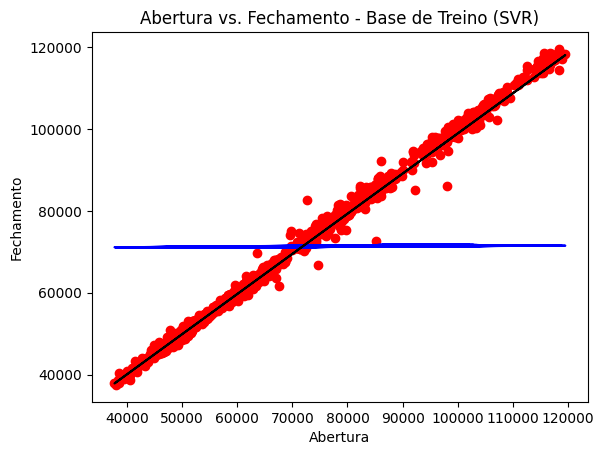

In [ ]:
plt.style.use('default')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor_rbf.predict(X_train), color='blue', label = 'RBF Model')
plt.plot(X_train, regressor_linear.predict(X_train), color='black', label = 'RBF Model')
plt.title('Abertura vs. Fechamento - Base de Treino (SVR)')
plt.xlabel('Abertura')
plt.ylabel('Fechamento')
plt.show()

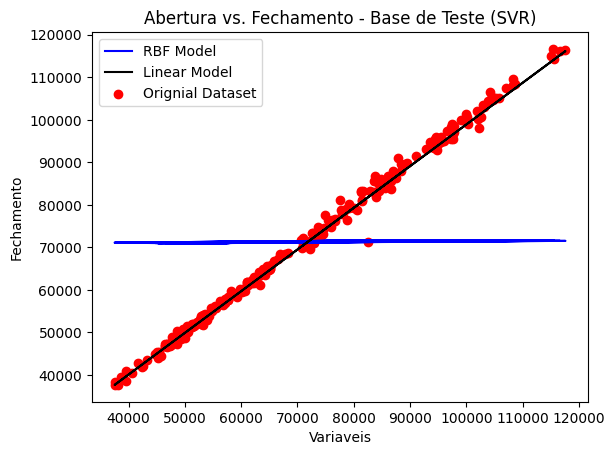

In [ ]:
plt.scatter(X_test, y_test, color = 'red', label = 'Orignial Dataset')
plt.plot(X_test, y_pred_rbf, color = 'blue', label = 'RBF Model')
plt.plot(X_test, y_pred_linear, color = 'black', label = 'Linear Model')
plt.title('Abertura vs. Fechamento - Base de Teste (SVR)')
plt.xlabel('Variaveis')
plt.ylabel('Fechamento')
plt.legend()
plt.show()

In [ ]:
X2 = df_ibov.iloc[:, 0].values
y2 = df_ibov.iloc[:, -1].values

## Comparando os Resultados

In [ ]:
# comparing the results
#criando um DF
df_result = df_ibov.iloc[:, -1]
df_result = df_result.to_frame()
df_result['RBF Model'] = regressor_rbf.predict(X).copy()
df_result['Linear Model'] = regressor_linear.predict(X).copy()
df_result

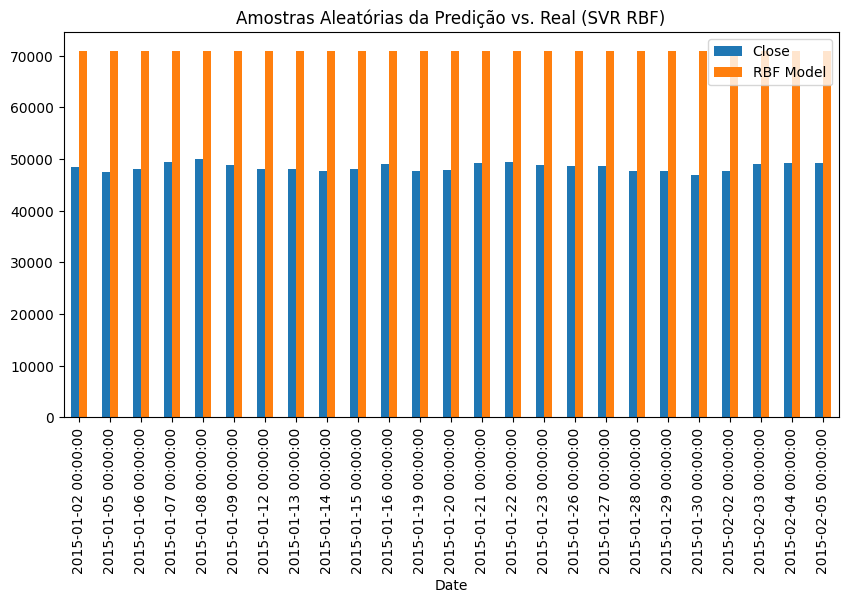

In [ ]:
# Comparing data  
df_bar = df_result[['Close', 'RBF Model']].head(25)
df_bar.plot(kind='bar',figsize=(10,5))
plt.title('Amostras Aleatórias da Predição vs. Real (SVR RBF)')
plt.show()

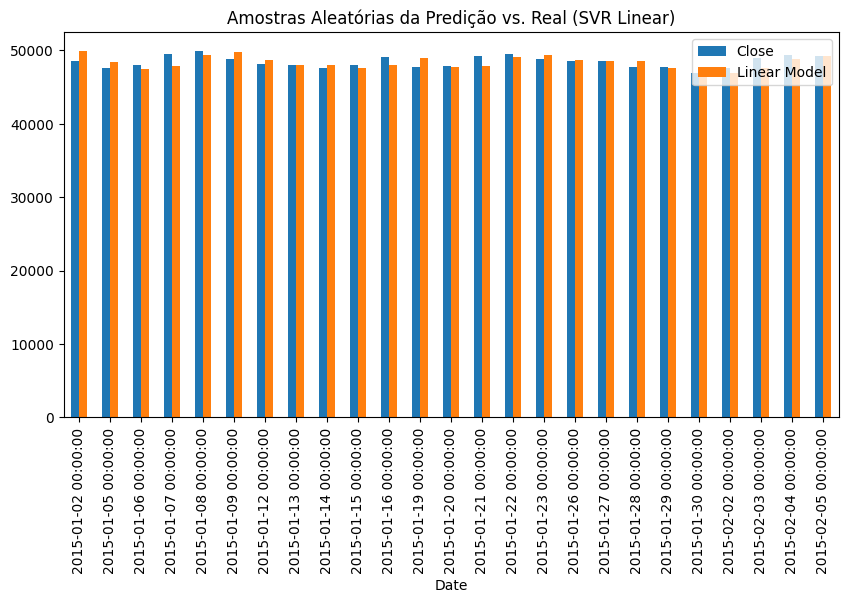

In [ ]:
df_bar = df_result[['Close', 'Linear Model']].head(25)
df_bar.plot(kind='bar',figsize=(10,5))
plt.title('Amostras Aleatórias da Predição vs. Real (SVR Linear)')
plt.show()

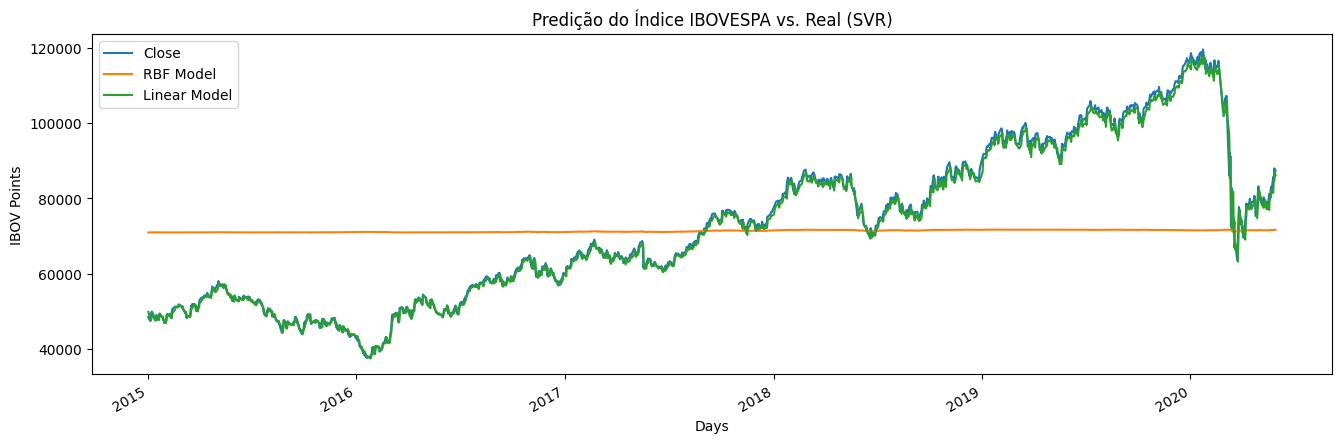

In [ ]:
df_result.plot.line(figsize=(16, 5))
plt.title('IBOV')
plt.xlabel('Days')
plt.ylabel('IBOV Points')
plt.legend(['Close', 'RBF Model', 'Linear Model'])
plt.title('Predição do Índice IBOVESPA vs. Real (SVR)')
plt.show()

## Coeficiente de Determinação

In [ ]:
#Erro quadrado R², o quanto uma variavel explica a outra
print(regressor_rbf.score(X, y))
print(regressor_linear.score(X, y))

0.022415663780381845
0.9949210171604008
